In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fdm import fdm
import scipy
from helper import get_df_all, download
from pathlib import Path
import emd

import requests
from tqdm.auto import tqdm

In [31]:
working_dir = Path('.')
DATA_PATH = Path("./Data")
save_model_path = working_dir / 'Model'
DE_path = DATA_PATH / '12k_DE'
FE_path = DATA_PATH / '12k_FE'


for path in [DATA_PATH, save_model_path]:
    if not path.exists():
        path.mkdir(parents=True)

In [62]:
data = get_df_all(FE_path, segment_length=1000)

In [63]:
data

,label,filename,0,1,2,3,4,5,6,7,...,990,991,992,993,994,995,996,997,998,999
0,1,B007_0.mat,-0.168120,0.181278,0.044345,-0.270454,-0.138070,0.082030,0.041421,-0.117928,...,-0.012508,0.057340,0.059614,-0.044507,0.021766,0.082517,-0.013482,-0.112405,-0.025177,0.081705
1,1,B007_0.mat,-0.056852,-0.134496,0.044832,0.046456,-0.150577,-0.032812,0.017705,-0.115004,...,-0.191349,0.032000,0.115167,-0.099410,-0.097786,0.107857,0.002924,-0.134984,0.019980,0.061563
2,1,B007_0.mat,-0.100872,-0.081055,0.014132,0.029726,0.014944,-0.019167,0.004386,0.004711,...,-0.114029,-0.061400,0.187937,0.020792,-0.174293,0.021929,0.147654,-0.038010,-0.027939,0.079756
3,1,B007_0.mat,-0.048731,-0.065136,0.075370,-0.052467,-0.063025,0.130111,0.078294,-0.048893,...,-0.162435,0.037198,0.165359,-0.080568,-0.263632,-0.004873,0.046132,-0.091289,-0.064649,-0.018680
4,1,B007_0.mat,0.043533,-0.011208,-0.039472,0.028426,0.010558,0.001137,0.084954,0.093400,...,0.056203,0.022091,0.121826,0.136121,0.050030,-0.011370,0.001787,-0.044832,-0.037035,0.015431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7127,3,OR021@6_0.mat,0.821110,-0.594513,-0.953088,1.282425,1.172782,-0.821516,-0.430047,1.127706,...,0.073096,-0.207917,-0.302535,-0.094212,0.007716,-0.043451,0.046700,0.125075,0.120202,0.087715
7128,3,OR021@6_0.mat,0.121826,0.103552,0.001218,-0.078375,-0.016244,0.094212,0.110456,0.116141,...,-0.418270,0.787404,-0.815018,-1.308009,0.656644,0.659081,-0.857657,-0.400809,0.927099,0.309033
7129,3,OR021@6_0.mat,-0.344769,0.499488,0.210760,-0.920195,-0.422737,0.568523,0.210353,-0.280607,...,0.064974,-0.146598,-0.357763,-0.241216,-0.187206,-0.142943,-0.175430,-0.072690,0.335022,0.375631
7130,3,OR021@6_0.mat,0.083654,0.285074,0.523447,0.096649,-0.332180,0.029644,0.442230,-0.110456,...,-0.083654,0.196953,-0.145786,-0.346799,-0.010558,0.096243,-0.065786,0.033299,0.090558,-0.105583


In [64]:
features = data.T[2:]

In [65]:
features

,0,1,2,3,4,5,6,7,8,9,...,7122,7123,7124,7125,7126,7127,7128,7129,7130,7131
0,-0.16812,-0.056852,-0.100872,-0.048731,0.043533,-0.000487,-0.059939,-0.003574,0.118253,0.086253,...,-0.199389,-0.03533,-0.235531,0.122232,-0.021929,0.82111,0.121826,-0.344769,0.083654,-0.051167
1,0.181278,-0.134496,-0.081055,-0.065136,-0.011208,0.009096,0.025665,-0.022903,-0.269967,-0.095837,...,0.111674,-0.02802,-0.449539,-0.067411,0.01868,-0.594513,0.103552,0.499488,0.285074,0.097461
2,0.044345,0.044832,0.014132,0.07537,-0.039472,-0.042558,0.134171,0.024853,-0.032,0.092426,...,0.214008,0.213602,0.194922,-0.004061,-0.112486,-0.953088,0.001218,0.21076,0.523447,-0.086497
3,-0.270454,0.046456,0.029726,-0.052467,0.028426,-0.050517,0.016244,0.090314,0.216688,0.000812,...,-0.01665,0.13076,0.005685,0.234313,0.0,1.282425,-0.078375,-0.920195,0.096649,-0.105989
4,-0.13807,-0.150577,0.014944,-0.063025,0.010558,0.086091,-0.112243,-0.041096,-0.017543,-0.199145,...,-0.064162,-0.165684,-0.651365,0.110456,0.231064,1.172782,-0.016244,-0.422737,-0.33218,0.174212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.082517,0.107857,0.021929,-0.004873,-0.01137,0.114679,0.027939,0.032487,0.134984,-0.026477,...,0.221724,0.827201,-0.006091,-0.241216,-0.085278,-0.043451,0.659081,-0.142943,0.096243,-0.182333
996,-0.013482,0.002924,0.147654,0.046132,0.001787,0.034599,0.091289,0.316586,0.211328,0.054578,...,-0.078375,0.238374,-0.029238,0.008122,1.135015,0.0467,-0.857657,-0.17543,-0.065786,0.309033
997,-0.112405,-0.134984,-0.03801,-0.091289,-0.044832,-0.072284,0.120364,-0.041421,-0.024853,-0.08869,...,-0.27614,-0.312688,-0.079593,0.15878,-0.343144,0.125075,-0.400809,-0.07269,0.033299,0.039391
998,-0.025177,0.01998,-0.027939,-0.064649,-0.037035,-0.025015,0.072446,-0.176242,0.001299,-0.072609,...,0.03005,0.331368,0.15878,-0.194516,-1.854197,0.120202,0.927099,0.335022,0.090558,-0.669639


In [66]:
features = features.T
features = np.asarray(features)

In [67]:
features

array([[-0.16812035928143715, 0.18127760479041916, 0.04434479041916167,
        ..., -0.11240510978043912, -0.02517744510978044,
        0.08170487025948103],
       [-0.05685229540918164, -0.13449628742514969, 0.04483209580838323,
        ..., -0.13498359281437125, 0.01997952095808383,
        0.061562914171656685],
       [-0.10087221556886228, -0.08105512974051896, 0.01413185628742515,
        ..., -0.03800982035928144, -0.02793884231536926,
        0.07975564870259481],
       ...,
       [-0.3447685628742515, 0.49948802395209585, 0.21075958083832336,
        ..., -0.07268972055888223, 0.33502245508982037,
        0.3756312375249501],
       [0.08365409181636727, 0.28507365269461077, 0.5234472055888223,
        ..., 0.03329920159680639, 0.09055758483033932,
        -0.10558283433133732],
       [-0.05116706586826347, 0.09746107784431138, -0.08649670658682634,
        ..., 0.03939051896207585, -0.6696388223552895,
        -0.22578483033932137]], dtype=object)

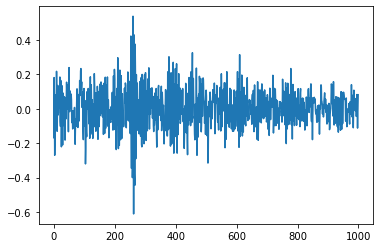

In [68]:
plt.plot(features[0])

In [69]:
fs = 12000
def create_fibfs(samples):
    fibfs = []
    for i in range(0,len(samples),1):
        sample = samples[i]
        sample=np.reshape(sample,(len(sample),1))
        fibfs.append(fdm(sample,fs=12000,fc=np.array([375,750,1500,3000,6000]),filter_type='dct',plot_subbands=False))
    return np.array(fibfs)

In [70]:
labels = data['label']
labels = np.asarray(labels)
labels

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

In [71]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [72]:
labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [73]:
idx = np.random.permutation(len(features))
features , labels = features[idx], labels[idx]

In [74]:
fibfs = create_fibfs(features)

In [75]:
test_fibfs = fibfs[-1250:]
fibfs = fibfs[0:-1250]
test_labels = labels[-1250:]
labels = labels[:-1250]

In [76]:
np.shape(test_labels)

(1250, 4)

In [77]:
def get_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(acc)+1)
    
    plt.plot(epochs,acc,'bo',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label = 'Validation acc')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs,loss,'bo',label='Training Loss')
    plt.plot(epochs,val_loss,'b',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()

In [80]:
from keras import layers,models

def get_model():
    input_seq = layers.Input(shape = (1000,5))
    conv1 = layers.Conv1D(24,7,padding="same", activation="tanh")(input_seq)
    pool1 = layers.MaxPooling1D(5)(conv1)
    conv2 = layers.Conv1D(24,9,padding="same", activation="tanh")(pool1)
    processed = layers.GlobalMaxPooling1D()(conv2)
    compressed = layers.Dense(50, activation="relu")(processed)
    compressed = layers.Dropout(0.3)(compressed)
    out = layers.Dense(4, activation='softmax')(compressed)
    model = models.Model(inputs=input_seq, outputs=out)
    model.compile(optimizer = 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

Epoch 1/50
148/148 [==============================] - 4s 20ms/step - loss: 0.9803 - accuracy: 0.5751 - val_loss: 0.6922 - val_accuracy: 0.6831
Epoch 2/50
148/148 [==============================] - 3s 18ms/step - loss: 0.6218 - accuracy: 0.7156 - val_loss: 0.5135 - val_accuracy: 0.8156
Epoch 3/50
148/148 [==============================] - 3s 17ms/step - loss: 0.4982 - accuracy: 0.7887 - val_loss: 0.3953 - val_accuracy: 0.8003
Epoch 4/50
148/148 [==============================] - 2s 17ms/step - loss: 0.3553 - accuracy: 0.8640 - val_loss: 0.2678 - val_accuracy: 0.9150
Epoch 5/50
148/148 [==============================] - 3s 18ms/step - loss: 0.2809 - accuracy: 0.8967 - val_loss: 0.2149 - val_accuracy: 0.9269
Epoch 6/50
148/148 [==============================] - 3s 18ms/step - loss: 0.2291 - accuracy: 0.9190 - val_loss: 0.1868 - val_accuracy: 0.9448
Epoch 7/50
148/148 [==============================] - 3s 19ms/step - loss: 0.1953 - accuracy: 0.9354 - val_loss: 0.1436 - val_accuracy: 0.9575

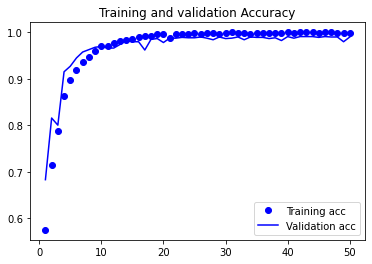

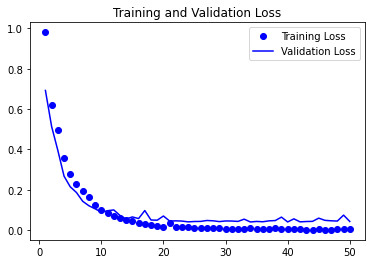

<Figure size 432x288 with 0 Axes>

In [81]:
temp_model = get_model()
history = temp_model.fit(fibfs,labels,epochs=50,validation_split=0.2)
get_curves(history)

In [82]:
k = 12
num_val_samples = len(fibfs)//k
validation_scores = []
model = None
for fold in range(k):
    val_data = fibfs[num_val_samples*fold:num_val_samples*(fold+1)]
    val_label = labels[num_val_samples*fold:num_val_samples*(fold+1)]
    train_data = np.concatenate((fibfs[:num_val_samples*fold],fibfs[num_val_samples*(fold+1):]))
    train_label = np.concatenate((labels[:num_val_samples*fold],labels[num_val_samples*(fold+1):]))
    model = get_model()
    model.fit(train_data,train_label,epochs=30)
    val_score = model.evaluate(val_data,val_label)
    validation_scores.append(val_score)

Epoch 1/30
169/169 [==============================] - 6s 27ms/step - loss: 0.9611 - accuracy: 0.6042
Epoch 2/30
169/169 [==============================] - 8s 45ms/step - loss: 0.5175 - accuracy: 0.7958
Epoch 3/30
169/169 [==============================] - 7s 44ms/step - loss: 0.3333 - accuracy: 0.8820
Epoch 4/30
169/169 [==============================] - 5s 32ms/step - loss: 0.2365 - accuracy: 0.9158
Epoch 5/30
169/169 [==============================] - 3s 19ms/step - loss: 0.1682 - accuracy: 0.9423
Epoch 6/30
169/169 [==============================] - 4s 21ms/step - loss: 0.1349 - accuracy: 0.9557
Epoch 7/30
169/169 [==============================] - 3s 17ms/step - loss: 0.1075 - accuracy: 0.9659
Epoch 8/30
169/169 [==============================] - 4s 23ms/step - loss: 0.0884 - accuracy: 0.9711
Epoch 9/30
169/169 [==============================] - 4s 21ms/step - loss: 0.0722 - accuracy: 0.9766
Epoch 10/30
169/169 [==============================] - 4s 25ms/step - loss: 0.0594 - accura

169/169 [==============================] - 3s 19ms/step - loss: 0.0346 - accuracy: 0.9900
Epoch 20/30
169/169 [==============================] - 3s 19ms/step - loss: 0.0385 - accuracy: 0.9865
Epoch 21/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0235 - accuracy: 0.9948
Epoch 22/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0217 - accuracy: 0.9939
Epoch 23/30
169/169 [==============================] - 3s 19ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 24/30
169/169 [==============================] - 3s 19ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 25/30
169/169 [==============================] - 3s 19ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 26/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0181 - accuracy: 0.9954
Epoch 27/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0151 - accuracy: 0.9959
Epoch 28/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0158 - accuracy:

169/169 [==============================] - 3s 21ms/step - loss: 0.1349 - accuracy: 0.9534
Epoch 8/30
169/169 [==============================] - 3s 18ms/step - loss: 0.1129 - accuracy: 0.9618
Epoch 9/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0984 - accuracy: 0.9644
Epoch 10/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0835 - accuracy: 0.9707
Epoch 11/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0741 - accuracy: 0.9774
Epoch 12/30
169/169 [==============================] - 3s 17ms/step - loss: 0.0567 - accuracy: 0.9813
Epoch 13/30
169/169 [==============================] - 3s 17ms/step - loss: 0.0595 - accuracy: 0.9813
Epoch 14/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0501 - accuracy: 0.9835
Epoch 15/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0417 - accuracy: 0.9865
Epoch 16/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0337 - accuracy: 0

169/169 [==============================] - 3s 17ms/step - loss: 0.0060 - accuracy: 0.9987
Epoch 26/30
169/169 [==============================] - 3s 16ms/step - loss: 0.0063 - accuracy: 0.9987
Epoch 27/30
169/169 [==============================] - 3s 16ms/step - loss: 0.0045 - accuracy: 0.9991
Epoch 28/30
169/169 [==============================] - 3s 17ms/step - loss: 0.0041 - accuracy: 0.9996
Epoch 29/30
169/169 [==============================] - 3s 17ms/step - loss: 0.0123 - accuracy: 0.9961
Epoch 30/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.9878
Epoch 1/30
169/169 [==============================] - 4s 16ms/step - loss: 0.9285 - accuracy: 0.5786
Epoch 2/30
169/169 [==============================] - 3s 16ms/step - loss: 0.5537 - accuracy: 0.7671
Epoch 3/30
169/169 [==============================] - 3s 16ms/step - loss: 0.3662 - accuracy: 0.8622
Epoch 4/30
169/169 [==============================] - 3s 17ms/step - loss: 0.2684 - accuracy: 0.9050

169/169 [==============================] - 3s 18ms/step - loss: 0.0415 - accuracy: 0.9885
Epoch 14/30
169/169 [==============================] - 3s 19ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 15/30
169/169 [==============================] - 3s 17ms/step - loss: 0.0309 - accuracy: 0.9907
Epoch 16/30
169/169 [==============================] - 3s 17ms/step - loss: 0.0254 - accuracy: 0.9931
Epoch 17/30
169/169 [==============================] - 3s 18ms/step - loss: 0.0245 - accuracy: 0.9933
Epoch 18/30
169/169 [==============================] - 3s 19ms/step - loss: 0.0188 - accuracy: 0.9944
Epoch 19/30
169/169 [==============================] - 3s 19ms/step - loss: 0.0165 - accuracy: 0.9965
Epoch 20/30
169/169 [==============================] - 3s 19ms/step - loss: 0.0140 - accuracy: 0.9970
Epoch 21/30
169/169 [==============================] - 3s 20ms/step - loss: 0.0147 - accuracy: 0.9961
Epoch 22/30
169/169 [==============================] - 3s 17ms/step - loss: 0.0122 - accuracy:

In [83]:
validation_scores

[[0.011405068449676037, 0.9938775300979614],
 [0.011852460913360119, 0.9979591965675354],
 [0.0983143001794815, 0.9714285731315613],
 [0.03181920573115349, 0.9857142567634583],
 [0.02667848765850067, 0.9877551198005676],
 [0.03278721868991852, 0.9877551198005676],
 [0.016010988503694534, 0.9938775300979614],
 [0.03248036652803421, 0.9877551198005676],
 [0.0473707877099514, 0.9857142567634583],
 [0.02436036802828312, 0.9938775300979614],
 [0.01548820361495018, 0.9897959232330322],
 [0.042963624000549316, 0.9877551198005676]]

In [84]:
validation_scores = np.array(validation_scores)
sum(validation_scores)/len(validation_scores)

array([0.03262759, 0.98860544])

In [85]:
y_pred = temp_model.predict(test_fibfs)

40/40 [==============================] - 0s 4ms/step


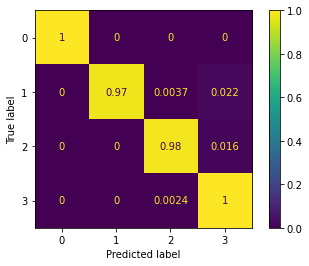

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(np.argmax(y_pred, axis=-1),np.argmax(test_labels,-1))


cm = confusion_matrix(np.argmax(y_pred, axis=-1),np.argmax(test_labels,-1),normalize = 'true')

from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm)

cmd.plot()

plt.show()

